

I chose the data from Monitoring BBC podcasts, they provide three types of data which automatic transcribe from audio. All those three types of data correspond some same audio source, but focus on different area. 

In the first one, the data includes all words appear in the audio and when each word appears and when word end and the transcription’s accuracy. 

The second one includes all paragraphs appear in the audio, when each paragraph appears, when paragraph end and the probability that the sentence will appear in an extractive summary.

The third one shows places were mentioned in the audio sources on the map.

Our team select different data for this assignment. I mainly use the first one.



# Get data from the link
First, I import the links from the website.

In [2]:
import pandas as pd
import numpy as np
import urllib.request
import ijson
import itertools
import requests
import bs4

In [3]:
root_url = 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/'
index_url = root_url + '?C=N;O=D'
def getUrls():
    response = requests.get(index_url)
    soup = bs4.BeautifulSoup(response.text, "lxml")
    return [a.attrs.get('href') for a in soup.select('[href^=2016]')]

urls = []
for item in getUrls():
    urls.append(root_url + item)
urls

['http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161231_220000_newshour.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161231_181500_six_oclock_news.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161231_140000_newshour.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161231_053000_the_world_this_week.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161231_000700_global_news_podcast.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161230_235300_world_business_report.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161230_220000_newshour.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161230_181500_six_oclock_news.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161230_181000_world_business_report.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161230_153800_global_news_podcast.asr.json',
 'http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161230_150000_newshour.asr.json',
 'http://data.

In [4]:
print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20161231_220000_newshour.asr.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20160924_233500_global_news_podcast.asr.json") + 1,"]")

[ 0 : 1000 ]


# Describe 

○  what is the general type of the data (tabular, network, geographical, textual 
etc.)?

For the first data source, there are several links online in Json format.See from above, there are totally 1000 audio files.
So I would like to choose one day first and see how those data looks like. Because our group would like to explore information about brexit, so Input the start link and the end link which I want to analyse to see what is section, then select all data from the brexit vote day(20160623)and built the dataframe.


In [5]:
print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20160623_232600_global_news_podcast.asr.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20160623_060300_best_of_today.asr.json") + 1,"]")

[ 1944 : 1956 ]


In [6]:
#Each file includes thousands of words,so select 10 news fisrt.
a = []
for item in urls[1944:1956]:     
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)
    
spokenWords = list(itertools.chain.from_iterable(a))

cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)

df20160623= pd.DataFrame(rows, index = indices, columns = cols)
df20160623 = df20160623.convert_objects(convert_numeric=True)
#ADD DATE AND DURATION COLUMNS
df20160623['date'] = "20160623"
df20160623['duration'] = df20160623['wordEnd']-df20160623['wordStart']
df20160623

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,wordEnd,wordId,wordStart,wordConfidence,date,duration
0,7.79,THIS,7.57,1.00,20160623,0.22
1,7.93,IS,7.79,1.00,20160623,0.14
2,8.01,THE,7.93,1.00,20160623,0.08
3,8.65,B.B.C.,8.01,1.00,20160623,0.64
4,9.29,THE,9.21,1.00,20160623,0.08
5,9.77,DETAILS,9.29,1.00,20160623,0.48
6,9.86,OF,9.77,1.00,20160623,0.09
7,10.00,OUR,9.86,1.00,20160623,0.14
8,10.47,COMPLETE,10.00,1.00,20160623,0.47
9,10.75,RANGE,10.47,1.00,20160623,0.28


# Clean
I think the confidence should not large than 100%,
so I would like to use assert to check the data.

In [7]:
for i in df20160623['wordConfidence']:
        assert i<=1, "There are wrong word confidence which more than 1"  

○  how large and complex is it (rows/columns, size, variation, structure) ?

See from this one day table, there are 54205 rows, I suspect in whole 2016, there are millions of rows. The 5 columns show wordStart,wordEnd and wordConfidence.I add yhe data column in order to caculate easier later.

○  What fields and data types are present ( levels for categorical 
values)?

In [8]:
df20160623.dtypes

wordEnd           float64
wordId             object
wordStart         float64
wordConfidence    float64
date               object
duration          float64
dtype: object

wordId,date are object and wordEnd wordStart and wordConfidence are float. 

I want to see the distribution of average confidence for each word on the brexit vote day.

I use groupby to caculate the sum of word confidence and the sum of the word repeat time.And divide them to get the result. 

In [9]:
#caculate the sum of word confidence
dfsum20160623 = df20160623["wordConfidence"].groupby(df20160623["wordId"]).sum()
dfsum20160623 = dfsum20160623.to_frame()
dfsum20160623 = dfsum20160623.reset_index(level=[])

#caculate sum of the word repeat time
dfRepeat20160623= pd.DataFrame({'repeat' : df20160623.groupby(["wordId"]).size()}).reset_index()

#divide them to get the result.
average20160623 = dfsum20160623.wordConfidence/dfRepeat20160623.repeat

#Also can just use .mean() 
dfsumdrtn20160623 = df20160623["duration"].groupby(df20160623["wordId"]).mean()

#Build a new dataframe
a = np.array(dfRepeat20160623.wordId)
b = np.array(dfRepeat20160623.repeat)
c = np.array(average20160623)
d = np.array(dfsumdrtn20160623)
e = np.vstack((a,b,c,d))
data20160623= pd.DataFrame(e).T
data20160623.columns=["wordId", "repeat","wordConfidence_average","Duration"]
data20160623= data20160623.convert_objects(convert_numeric=True)
data20160623['date'] = 20160623
data20160623

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,wordId,repeat,wordConfidence_average,Duration,date
0,A,1460,0.986075,0.091822,20160623
1,A.,1,1.000000,0.180000,20160623
2,A.D.,1,1.000000,0.420000,20160623
3,A.M.,3,0.996667,0.376667,20160623
4,A.O.L.,1,0.660000,0.350000,20160623
5,ABE,1,0.990000,0.190000,20160623
6,ABERRATION,2,1.000000,0.600000,20160623
7,ABIDE,1,0.650000,0.400000,20160623
8,ABILITIES,1,1.000000,0.600000,20160623
9,ABILITY,2,1.000000,0.535000,20160623


○  Summary statistics about the data - how many people, what time frame, field averages etc. 

  See from table, there used total 6968 different words in the brevit vote day.

In [10]:
data20160623.loc[data20160623['repeat']==data20160623['repeat'].max()]

,wordId,repeat,wordConfidence_average,Duration,date
5792,THE,3096,0.994612,0.115662,20160623


In [11]:
data20160623.loc[data20160623['wordConfidence_average']==data20160623['wordConfidence_average'].min()]

,wordId,repeat,wordConfidence_average,Duration,date
896,CEILING,1,0.44,0.46,20160623


○  What fields and data types are present (max/min). 

For the numbers of the word was used the max times are 5020, it the word-the.Undoubtly, the min time is 1.
For the accurity, the min value is 34% for word-aussie.

○  Links between this data and other data 

See from above, you can see from these data I can get other data,like how many words and how many different words they use for one day,and the average confidence.

Now I would like to explore more....




○  How does the data relate to the questions that the data owner has discussed with you? 

The data owner told us the area which we want to explore can be quite flexibility. We have basic idea that we want to explore what influence was brought by the brexit. So the time period mainly focus on the duration of the brexit vote.

Based on my data,I would like to explore the relationship among 
"word repeat time"
"the average confidence of word(level of accuracy)"
“time”
"word speak duration"
 the original table did not provide these data, so I need to calculate them first and then do visualization.

---------------

# Explore

Now I would like to select the article one day before the brexit vote day.(20160622)

In [12]:
print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20160622_003000_hardtalk.asr.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20160622_230800_global_news_podcast.asr.json") + 1,"]")

[ 1966 : 1957 ]


In [13]:
a = []
for item in urls[1957:1966]:     
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)
    
spokenWords = list(itertools.chain.from_iterable(a))

cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)

df20160622= pd.DataFrame(rows, index = indices, columns = cols)
df20160622 = df20160622.convert_objects(convert_numeric=True)
df20160622['date'] = "20160622"
df20160622['duration'] = df20160622['wordEnd']-df20160622['wordStart']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Now I would like to select the article one day after the brexit vote day(20160625).

In [14]:
print ("[", urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20160624_000600_hardtalk.asr.json"),":",
       urls.index("http://data.cstr.ed.ac.uk/globalvox/asr/2016/20160624_215400_newshour.asr.json") + 1,"]")

[ 1943 : 1934 ]


In [15]:
#Each file includes thousands of words,so select 10 news fisrt.
a = []
for item in urls[1934:1943]:     
    f = urllib.request.urlopen(item)
    objects = ijson.items(f, "segments.item")
    segments = list (objects)
    spokenWords = [words["spokenWords"] for words in segments]
    spokenWords = list(itertools.chain.from_iterable(spokenWords))
    a.append(spokenWords)
    
spokenWords = list(itertools.chain.from_iterable(a))

cols = list(spokenWords[0].keys())
rows = []
indices = []
for index, d in enumerate(spokenWords):
    indices.append(index)
    values = []
    for col in cols:
        values.append(d[col])
    rows.append(values)

df20160624= pd.DataFrame(rows, index = indices, columns = cols)
df20160624 = df20160624.convert_objects(convert_numeric=True)
df20160624['date'] = "20160624"
df20160624['duration'] = df20160624['wordEnd']-df20160624['wordStart']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Integrate into one dataframe

In [16]:
frame=[df20160622,df20160623,df20160624]
Total=pd.concat(frame,keys=['20160622','20160623','20160624'],axis=0,join='outer').fillna(0)
Total

wordEnd    wordId  wordStart  wordConfidence      date  \
20160622 0         3.70         I       3.52            1.00  20160622   
         1         3.85     WOULD       3.70            1.00  20160622   
         2         4.19   WELCOME       3.85            1.00  20160622   
         3         4.26        TO       4.19            1.00  20160622   
         4         4.50      NEWS       4.26            1.00  20160622   
         5         4.76     AFTER       4.50            1.00  20160622   
         6         4.86       THE       4.76            1.00  20160622   
         7         5.33    B.B.C.       4.86            1.00  20160622   
         8         5.75     WORLD       5.33            1.00  20160622   
         9         6.15   SERVICE       5.75            1.00  20160622   
         10        6.26        WE       6.15            1.00  20160622   
         11        6.55    COMING       6.26            1.00  20160622   
         12        6.82       SHE       6.55            0.90  20160622   
         13        7.28      LINE       6.82            0.90  20160622   
         14        7.52      FROM       7.28            1.00  20160622   
         15        8.07    LONDON       7.52            1.00  20160622   
         16        8.36       I'M       8.17            1.00  20160622   
         17        8.63     JAMES       8.36            1.00  20160622   
         18        8.88     GONNA       8.63            1.00  20160622   
         19        9.20   DOESN'T       8.88            1.00  20160622   
         20        9.58    COMING       9.20            1.00  20160622   
         21        9.78        UP       9.58            1.00  20160622   
         22        9.99        IS       9.78            1.00  20160622   
         23       10.18       THE       9.99            1.00  20160622   
         24       10.85      FIVE      10.22            1.00  20160622   
         25       11.38    DECADE      10.93            1.00  20160622   
         26       11.59      LONG      11.38            1.00  20160622   
         27       11.82       WAR      11.59            1.00  20160622   
         28       11.94        IN      11.82            0.53  20160622   
         29       12.63  COLOMBIA      11.95            0.53  20160622   
...                 ...       ...        ...             ...       ...   
20160624 77691  1709.79       THE    1709.70            1.00  20160624   
         77692  1710.23    TOPICS    1709.79            1.00  20160624   
         77693  1710.51   COVERED    1710.23            1.00  20160624   
         77694  1710.61        IN    1710.51            1.00  20160624   
         77695  1710.80        IT    1710.61            1.00  20160624   
         77696  1711.08       YOU    1710.94            1.00  20160624   
         77697  1711.23       CAN    1711.08            1.00  20160624   
         77698  1711.42      SEND    1711.23            1.00  20160624   
         77699  1711.57        AN    1711.42            1.00  20160624   
         77700  1711.89     EMAIL    1711.57            1.00  20160624   
         77701  1712.59   ADDRESS    1712.24            1.00  20160624   
         77702  1712.73        IS    1712.59            1.00  20160624   
         77703  1713.00    GLOBAL    1712.73            1.00  20160624   
         77704  1713.50   PODCAST    1713.00            1.00  20160624   
         77705  1713.81        AT    1713.61            1.00  20160624   
         77706  1714.21    B.B.C.    1713.81            1.00  20160624   
         77707  1714.42       DOT    1714.21            1.00  20160624   
         77708  1714.84      C.O.    1714.45            1.00  20160624   
         77709  1715.10       DOT    1714.84            1.00  20160624   
         77710  1715.53      U.K.    1715.10            1.00  20160624   
         77711  1715.87       I'M    1715.66            1.00  20160624   
         77712  1716.18   VALERIE    1715.87            1.00  20160624   
         77713  1716

In [17]:
for i in Total['wordConfidence']:
      assert i<=1, "There are wrong word confidence which more than 1"  

Caculate the average confidence,average duraction for each word and the word repeat for 20160622 and 20160624

In [18]:
dfsum20160622 = df20160622["wordConfidence"].groupby(df20160622["wordId"]).sum()
dfsum20160622 = dfsum20160622.to_frame()
dfsum20160622 = dfsum20160622.reset_index(level=[])

dfRepeat20160622= pd.DataFrame({'repeat' : df20160622.groupby(["wordId"]).size()}).reset_index()

average20160622 = dfsum20160622.wordConfidence/dfRepeat20160622.repeat
#Also can just use .mean() 
dfsumdrtn20160622 = df20160622["duration"].groupby(df20160622["wordId"]).mean()

a = np.array(dfRepeat20160622.wordId)
b = np.array(dfRepeat20160622.repeat)
c = np.array(average20160622)
d = np.array(dfsumdrtn20160622)
e = np.vstack((a,b,c,d))
data20160622= pd.DataFrame(e).T
data20160622.columns=["wordId", "repeat","wordConfidence_average","Duration"]
data20160622= data20160622.convert_objects(convert_numeric=True)
data20160622['date'] = 20160622
data20160622

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,wordId,repeat,wordConfidence_average,Duration,date
0,A,1251,0.986027,0.095412,20160622
1,A.,4,0.972500,0.185000,20160622
2,A.M.,1,1.000000,0.460000,20160622
3,A.R.D.,2,1.000000,0.625000,20160622
4,ABACK,1,1.000000,0.340000,20160622
5,ABANDON,1,1.000000,0.430000,20160622
6,ABANDONED,1,1.000000,0.650000,20160622
7,ABBA,1,1.000000,0.270000,20160622
8,ABBAS,1,1.000000,0.460000,20160622
9,ABBY,2,0.950000,0.450000,20160622


In [19]:
#caculate the sum of word confidence
dfsum20160624 = df20160624["wordConfidence"].groupby(df20160624["wordId"]).sum()
dfsum20160624 = dfsum20160624.to_frame()
dfsum20160624 = dfsum20160624.reset_index(level=[])

#caculate sum of the word repeat time
dfRepeat20160624= pd.DataFrame({'repeat' : df20160624.groupby(["wordId"]).size()}).reset_index()

#divide them to get the result.
average20160624 = dfsum20160624.wordConfidence/dfRepeat20160624.repeat


#Also can just use .mean() 
dfsumdrtn20160624 = df20160624["duration"].groupby(df20160624["wordId"]).mean()

a = np.array(dfRepeat20160624.wordId)
b = np.array(dfRepeat20160624.repeat)
c = np.array(average20160624)
d = np.array(dfsumdrtn20160624)
e = np.vstack((a,b,c,d))
data20160624= pd.DataFrame(e).T
data20160624.columns=["wordId", "repeat","wordConfidence_average","Duration"]
data20160624= data20160624.convert_objects(convert_numeric=True)
data20160624['date'] = 20160624
data20160624


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,wordId,repeat,wordConfidence_average,Duration,date
0,A,1892,0.986025,0.090248,20160624
1,A.,7,0.998571,0.188571,20160624
2,A.M.,1,1.000000,0.260000,20160624
3,ABANDONED,1,1.000000,0.480000,20160624
4,ABANDONING,2,1.000000,0.665000,20160624
5,ABDUR,1,1.000000,0.400000,20160624
6,ABERDEEN,5,1.000000,0.514000,20160624
7,ABETTED,1,1.000000,0.520000,20160624
8,ABIDED,1,1.000000,0.390000,20160624
9,ABILITY,1,1.000000,0.390000,20160624


In [20]:
frame=[data20160622,data20160623,data20160624]
Total_add_avrg=pd.concat(frame,keys=['data20160622','data20160623','data20160624'],axis=0,join='outer').fillna(0)
Total_add_avrg

wordId  repeat  wordConfidence_average  Duration  \
data20160622 0              A    1251                0.986027  0.095412   
             1             A.       4                0.972500  0.185000   
             2           A.M.       1                1.000000  0.460000   
             3         A.R.D.       2                1.000000  0.625000   
             4          ABACK       1                1.000000  0.340000   
             5        ABANDON       1                1.000000  0.430000   
             6      ABANDONED       1                1.000000  0.650000   
             7           ABBA       1                1.000000  0.270000   
             8          ABBAS       1                1.000000  0.460000   
             9           ABBY       2                0.950000  0.450000   
             10      ABDUCTED       1                1.000000  0.700000   
             11      ABERDEEN       1                0.940000  0.320000   
             12      ABETTING       1                1.000000  0.420000   
             13         ABIDE       1                1.000000  0.490000   
             14     ABILITIES       1                1.000000  0.450000   
             15       ABILITY       4                1.000000  0.512500   
             16        ABJECT       1                1.000000  0.360000   
             17          ABLE      21                1.000000  0.237619   
             18     ABOLISHES       1                1.000000  0.570000   
             19      ABORTION       1                1.000000  0.620000   
             20         ABOUT     208                0.997452  0.284375   
             21         ABOVE       6                1.000000  0.313333   
             22        ABROAD       4                0.977500  0.395000   
             23       ABSENCE       2                0.870000  0.500000   
             24        ABSENT       1                1.000000  0.380000   
             25      ABSOLUTE       5                1.000000  0.536000   
             26    ABSOLUTELY      28                1.000000  0.655357   
             27      ABSORBED       1                1.000000  0.380000   
             28     ABSORBING       2                1.000000  0.645000   
             29      ABSTRACT       1                1.000000  0.560000   
...                       ...     ...                     ...       ...   
data20160624 6938     YIELDED       1                1.000000  0.560000   
             6939        YORK       2                1.000000  0.405000   
             6940   YORKSHIRE       1                1.000000  0.420000   
             6941         YOU     689                0.992206  0.146909   
             6942       YOU'D       8                0.991250  0.228750   
             6943      YOU'LL      16                0.985625  0.214375   
             6944      YOU'RE      53                0.992075  0.173396   
             6945      YOU'VE      25                0.971600  0.179200   
             6946      YOUGOV       1                1.000000  0.650000   
             6947       YOUNG      28                0.992143  0.267143   
             6948     YOUNGER      13                1.000000  0.400000   
             6949    YOUNGEST       1                1.000000  0.670000   
             6950        YOUR      89                0.994045  0.218989   
             6951       YOURS       3                0.986667  0.393333   
             6952    YOURSELF       3                1.000000  0.526667   
             6953       YOUTH       2                0.955000  0.245000   
             6954        YUKI       1                1.000000  0.530000   
             6955       YUNUS       1                1.000000  0.480000   
             6956        YURI       1                0.990000  0.360000   
             6957       YUSHU       1                0.980000  0.640000   
             6958          Z.       1                1.000000  0.240000   
             6959        ZANA       1           

1. I want see the distribution of average confidence of words around the brexit day.

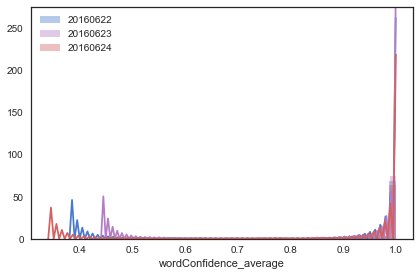

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)
ConAverg20160622=data20160622['wordConfidence_average']
ConAverg20160623=data20160623['wordConfidence_average']
ConAverg20160624=data20160624['wordConfidence_average']

sns.distplot(ConAverg20160622, color="b", label='20160622')
sns.distplot(ConAverg20160623, color="m", label='20160623')
sns.distplot(ConAverg20160624, color="r", label='20160624')

plt.tight_layout()
plt.legend()
plt.show()

Actually, we can see from the picture the biggest average confidence is 1.0 for those three days which means the assert function works sucessful.
 

○  Ideas about trends, outliers, clusters 

We can see from the picture,most value fix in the section of 9.0-1.0, so we can say the  quatility of automatic transcription is ok.

For the distribution,we can see the red color is the most widespread,the blue one is second,and the purple‘s distribution area is the most narrow.

For the lowest word average confidence,the red one is below 0.4, the blue one is around 0.4, the purple one is bigger than 0.4.

For the biggest word average confidence,three color all achieve 1,but the purple is the highest, the red one is the lowest.

○  relationships between variables 

So the red one stand for the best quatility of transcription among these period.

○ What do you think might be behind the relationships and 
distributions that you have found? How does your data relate to the world?

On the 20160623(brexit vote day),the quatility of transcription is the best one.Maybe on that day, announcer pronounced more accurately than normal day.

2.What is the average confidence on different days? I would like to use boxplot to explore.






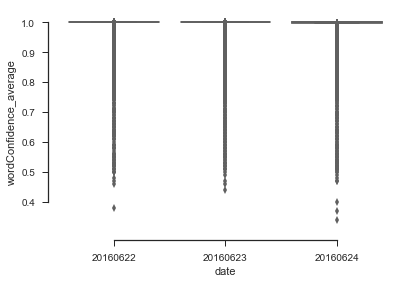

In [22]:
sns.set(style="ticks")

sns.boxplot(x='date', y="wordConfidence_average",data=Total_add_avrg, palette="PRGn")
sns.despine(offset=10, trim=True)

○  Ideas about trends, outliers, clusters 

We can see from the picture, all those three days median are around 1.0. But 20160624 is a bit below 1.0.
The distribution of 20160624 is widest, the 20160622 is the second and the 20160623 is the narrowest.

○ What do you think might be behind the relationships and distributions that you have found? 
  How does your data relate to the world?
  On the and 2016062220(the day before brexit vote day) and 160623(brexit vote day) ,the quatility of transcription is the better than 20160624 .Maybe after knowing the vote result, announcer's emotion was influenced and pronounced not so accurate than before.

3.I want to see how much words were used for each day.

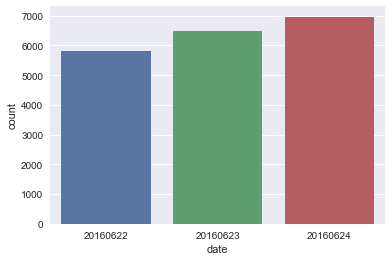

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")
ax=sns.countplot(x="date", data=Total_add_avrg)

○  Ideas about trends, outliers, clusters 

From the picture,we can see 20160622 used around 5800 different words whole day, 20160623 used around 6500 different words whole day,20160624 used around 7000 different words whole day.

○  Reference to statistics, relationships between variables analysed

It is very clear 20160624 used most different words

○ What do you think might be behind the relationships and distributions that you have found? 
  How does your data relate to the world?
  
I suspect because the brexit is a hot topic, so people use more words for discussion.


4.I want to see the how does the average confidence relate to the duration of word in these three days.

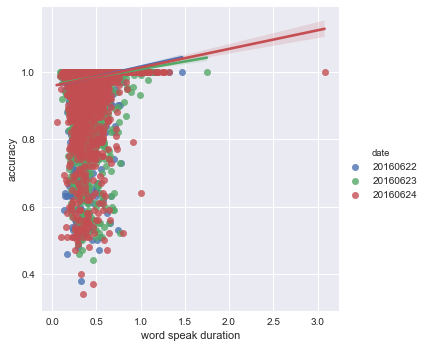

In [44]:
g = sns.lmplot(x="Duration", y="wordConfidence_average", hue="date",
               truncate=True, size=5, data=Total_add_avrg)

g.set_axis_labels("word speak duration", "accuracy")


○  Ideas about trends, outliers, clusters 

We can see from the picture, the data does not show as linear.
Most of the duration of word no longer than 1 second.

○  relationships between variables analysed 

So I think the the average confidence do not relate to the duration of word in these three days.

○  What do you think might be behind the relationships and 
distributions that you have found? How does your data relate to the world?

I suspect the automatic transcription accuracy would not be influenced by how much time the speaker speak one words. 

5.I want to see the how does the average confidence relate to the repeat time of word in these three days.

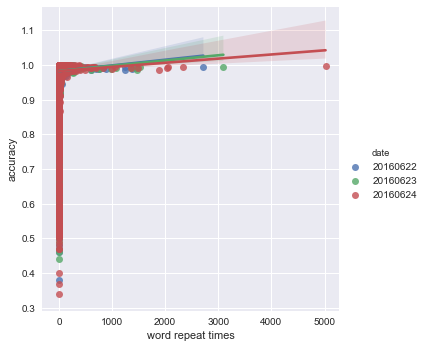

In [45]:
g = sns.lmplot(x="repeat", y="wordConfidence_average", hue="date",
               truncate=True, size=5, data=Total_add_avrg)

g.set_axis_labels("word repeat times", "accuracy")

○  Ideas about trends, outliers, clusters 

From this picture, it shows most words would not be repeated more than 100 times, the highest repeat time is around 500.

○  relationships between variables analysed 

The relationship is not obviouse, but we still can find that those words which were repeated more than 300 times ,their  automatic transcription accuracy are quite high.
 
○  What do you think might be behind the relationships and 
distributions that you have found? How does your data relate to the world?

I suspect maybe because those words which appear several times, the machine would be more familar to learn(machine learning?),so the automatic transcription accuracy are quite high.

6.Select those repeat time more than 500,and see whether the confidence be infludenced by date

In [75]:
Select=Total_add_avrg[Total_add_avrg["repeat"] > 500] 
Select

wordId  repeat  wordConfidence_average  Duration      date
data20160622 0         A    1251                0.986027  0.095412  20160622
             235     AND    1382                0.989493  0.216310  20160622
             2505      I     691                0.988900  0.116136  20160622
             2568     IN     827                0.989831  0.144486  20160622
             2726     IS     744                0.989167  0.169489  20160622
             2740     IT     600                0.986350  0.142883  20160622
             3525     OF    1251                0.992734  0.126867  20160622
             5176   THAT     888                0.989054  0.192320  20160622
             5178    THE    2719                0.994090  0.118944  20160622
             5252     TO    1472                0.992092  0.141787  20160622
             5796    YOU     665                0.991699  0.141489  20160622
data20160623 0         A    1460                0.986075  0.091822  20160623
             224     AND    1351                0.991821  0.206573  20160623
             2793      I     684                0.991725  0.124561  20160623
             2861     IN    1076                0.992463  0.144489  20160623
             3033     IS     761                0.989185  0.174717  20160623
             3049     IT     597                0.986533  0.145059  20160623
             3907     OF    1452                0.992617  0.127039  20160623
             5787   THAT     970                0.988258  0.199814  20160623
             5792    THE    3096                0.994612  0.115662  20160623
             5874     TO    1530                0.994176  0.141575  20160623
             6463    YOU     766                0.990587  0.146371  20160623
data20160624 0         A    1892                0.986025  0.090248  20160624
             233     AND    2038                0.990770  0.207134  20160624
             532      BE     656                0.994863  0.155838  20160624
             849     BUT     599                0.990217  0.192137  20160624
             2416    FOR     678                0.994381  0.170398  20160624
             2779   HAVE     531                0.993333  0.186422  20160624
             2950      I    1051                0.993406  0.126289  20160624
             3018     IN    1496                0.992400  0.143402  20160624
             3200     IS    1002                0.988303  0.169012  20160624
             3215     IT     831                0.990445  0.140866  20160624
             4155     OF    2059                0.995041  0.118494  20160624
             4177     ON     548                0.993303  0.171825  20160624
             6189   THAT    1361                0.989868  0.186385  20160624
             6193    THE    5020                0.996657  0.108492  20160624
             6226   THIS     639                0.994820  0.208592  20160624
             6274     TO    2333                0.994848  0.134955  20160624
             6709    WAS     607                0.992488  0.180445  20160624
             6731     WE     600                0.995250  0.147167  20160624
             6941    YOU     689                0.992206  0.146909  20160624

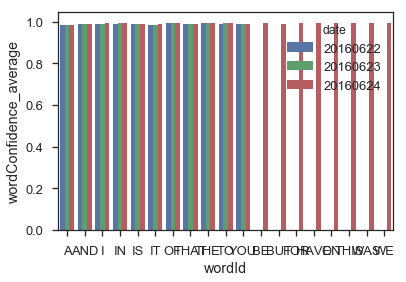

In [76]:
sns.set(style="ticks", context="talk")
rs = np.random.RandomState(7)

ax = sns.barplot(x="wordId", y="wordConfidence_average", hue="date", data=Select)

Actually, the relation is not obviouse.



-------------

# Reflection


○  A 200 word reflection on the data 

    I think I got  large volume of data，but it quite single.So I have to observe,caculate and explore the data by my self.Actually, most data I used for drawing those plots are secondary data created based on the original one. The feeling of creating them are magic. Deal with the real data is quite different from the first assignment.How to get much more information from exist data, what area I would like to explore, based on my purpose what kind of plot is the most suitable one? I need to think about these thing by myself. Luckily,the data is simple but clean.
    I met several problem this time. First,when I merge dataframes together, it failed ,I do not know the reason.Then I found because I used the groupby and it changed the index, so I added the index and then soloved this problem. Second,since I would like to use different date's data to caculate the same value. At first I would like to write some function, but it failed. But I still want to try to do in this way,if there are several dates' data, it will be helpful. 

○  3-5 hypotheses 

▪1  On the 20160623(brexit vote day),the quatility of transcription is the best one.Maybe on that day, announcer pronounced more accurately than normal day.

See from visualization1,For the distribution,we can see the 20160624 is the most widespread,the 20160622 is second,and the 20160623‘s distribution area is the most narrow.
For the lowest word average confidence,the 20160624 is below 0.4, the 20160622 is around 0.4, the 20160623 is bigger than 0.4.For the biggest word average confidence,three color all achieve 1,but the 20160623 is the highest, the 20160624 is the lowest.

▪2  On the and 2016062220(the day before brexit vote day) and 160623(brexit vote day) ,the quatility of transcription is the better than 20160624 .Maybe after knowing the vote result, announcer's emotion was influenced and pronounced not so accurate than before.

See from visualization2, We can see from the picture, all those three days median are around 1.0. But 20160624 is a bit below 1.0. The distribution of 20160624 is widest, the 20160622 is the second and the 20160623 is the narrowest.

▪3  I suspect because the brexit is a hot topic, so people use more words for discussion. It is very clear 20160624 used most different words.

See from visualization3,we can see 20160622 used around 5800 different words whole day, 20160623 used around 6500 different words whole day,20160624 used around 7000 different words whole day.

▪4  I suspect the automatic transcription accuracy would not be influenced by how much time the speaker speak one words.

See from visualization4, the data does not show as linear. Most of the duration of word no longer than 1 second.
So I think the the average confidence do not relate to the duration of word in these three days.

▪5  I suspect maybe because those words which appear several times, the machine would be more familar to learn(machine learning?),so the automatic transcription accuracy are quite high.

See from visualization5&6, it shows most words would not be repeated more than 100 times, the highest repeat time is around 500.
The relationship is not obviouse, but we still can find that those words which were repeated more than 300 times ,their automatic transcription accuracy are quite high.

○ How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..)

1.I would like to include more date from different data, and to see whether my hypothesis is correct.

2 Also, I would talk with my groupmates and show what we foung with eacher other, I think each of us will get a part of the whole data picture, and when we put them together, we will get the whole picture.
